In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
import datetime
#Import data
nasa = pd.read_csv("../data/nasa_facebook_statuses.csv",
                   usecols=["status_published","num_reactions",
                            "num_comments","num_shares","num_likes"])

#Convert column type to date time

nasa["status_published"] = pd.to_datetime(nasa["status_published"])

#Select observations between two datetimes - May 2015

filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]

#Add column with day only

nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)

#Remove column with status_published - we don't need it anymore

nasa.drop('status_published', axis='columns', inplace=True)

#Group all columns by sum

nasa_by_month = nasa.groupby(by='month').sum()

nasa_by_month.head()

,num_reactions,num_comments,num_shares,num_likes
month,,,,
3,3003815,49108,392585,2846361
4,2927616,120118,370803,2760385
5,2708977,46122,393576,2548960


<Axes: title={'center': 'NASA Facebook activity'}, ylabel='num_likes'>

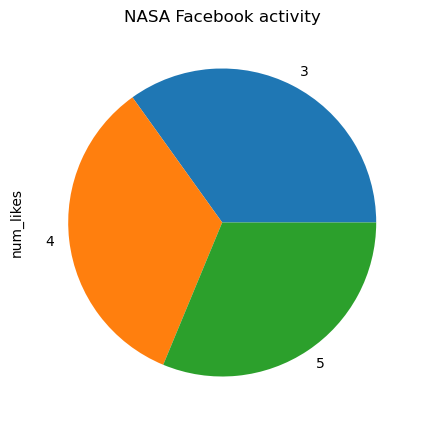

In [7]:
nasa_by_month['num_likes'].plot(figsize=(5,5),
                 title='NASA Facebook activity',
                 kind='pie')

array([<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>,
       <Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>],
      dtype=object)

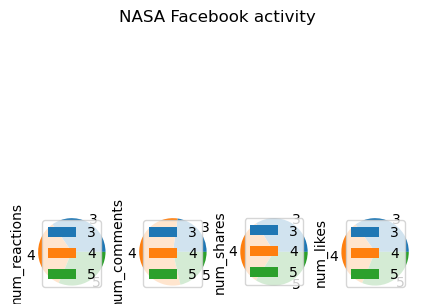

In [8]:
nasa_by_month.plot(figsize=(5,5),
                   title='NASA Facebook activity',
                   kind='pie',
                   subplots=True)

array([[<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>],
       [<Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>]],
      dtype=object)

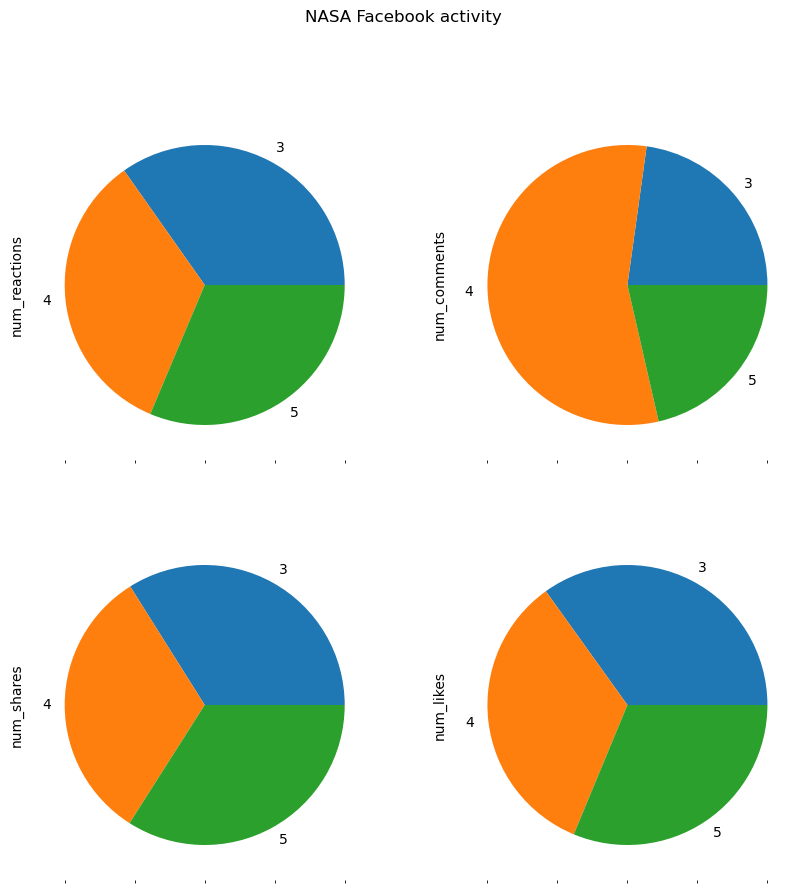

In [12]:
nasa_by_month.plot(figsize=(10,10),
                   title='NASA Facebook activity',
                   kind='pie',
                   subplots=True,
                   layout=(2,2),
                   legend=False)

array([[<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>],
       [<Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>]],
      dtype=object)

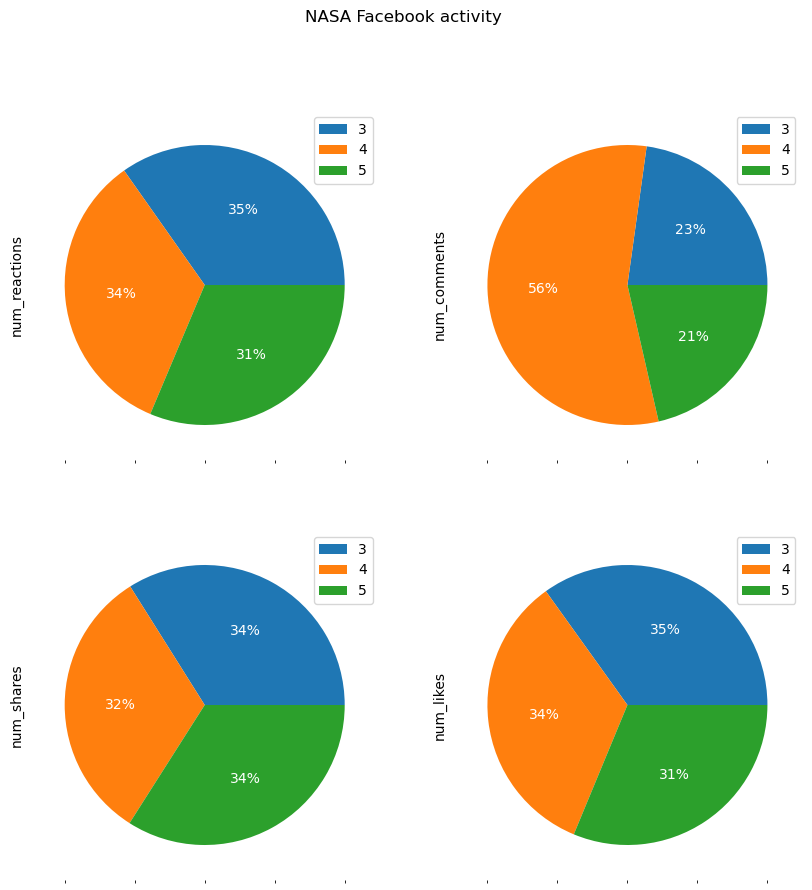

In [15]:
nasa_by_month.plot(figsize=(10,10),
                   title='NASA Facebook activity',
                   kind='pie',
                   subplots=True,
                   layout=(2,2),
                   legend=True,
                   autopct='%.0f%%',
                   textprops=dict(color='w'))